# 1.Import Libraries

In [36]:
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2.Import Dataset

In [3]:
gas=pd.read_csv('gas_turbines.csv')
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# 3.Data Understanding

In [4]:
gas.shape

(15039, 11)

In [5]:
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
gas.describe(include='all')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [9]:
corr_matrix=gas.corr()

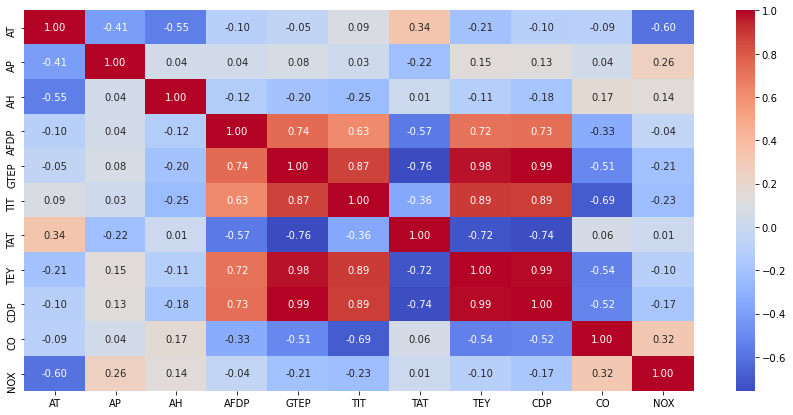

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

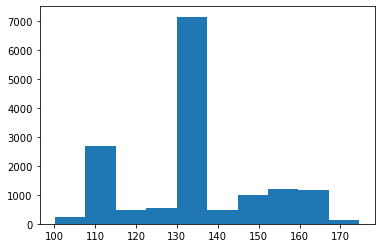

In [14]:
plt.hist(gas['TEY'])

<Figure size 720x216 with 0 Axes>

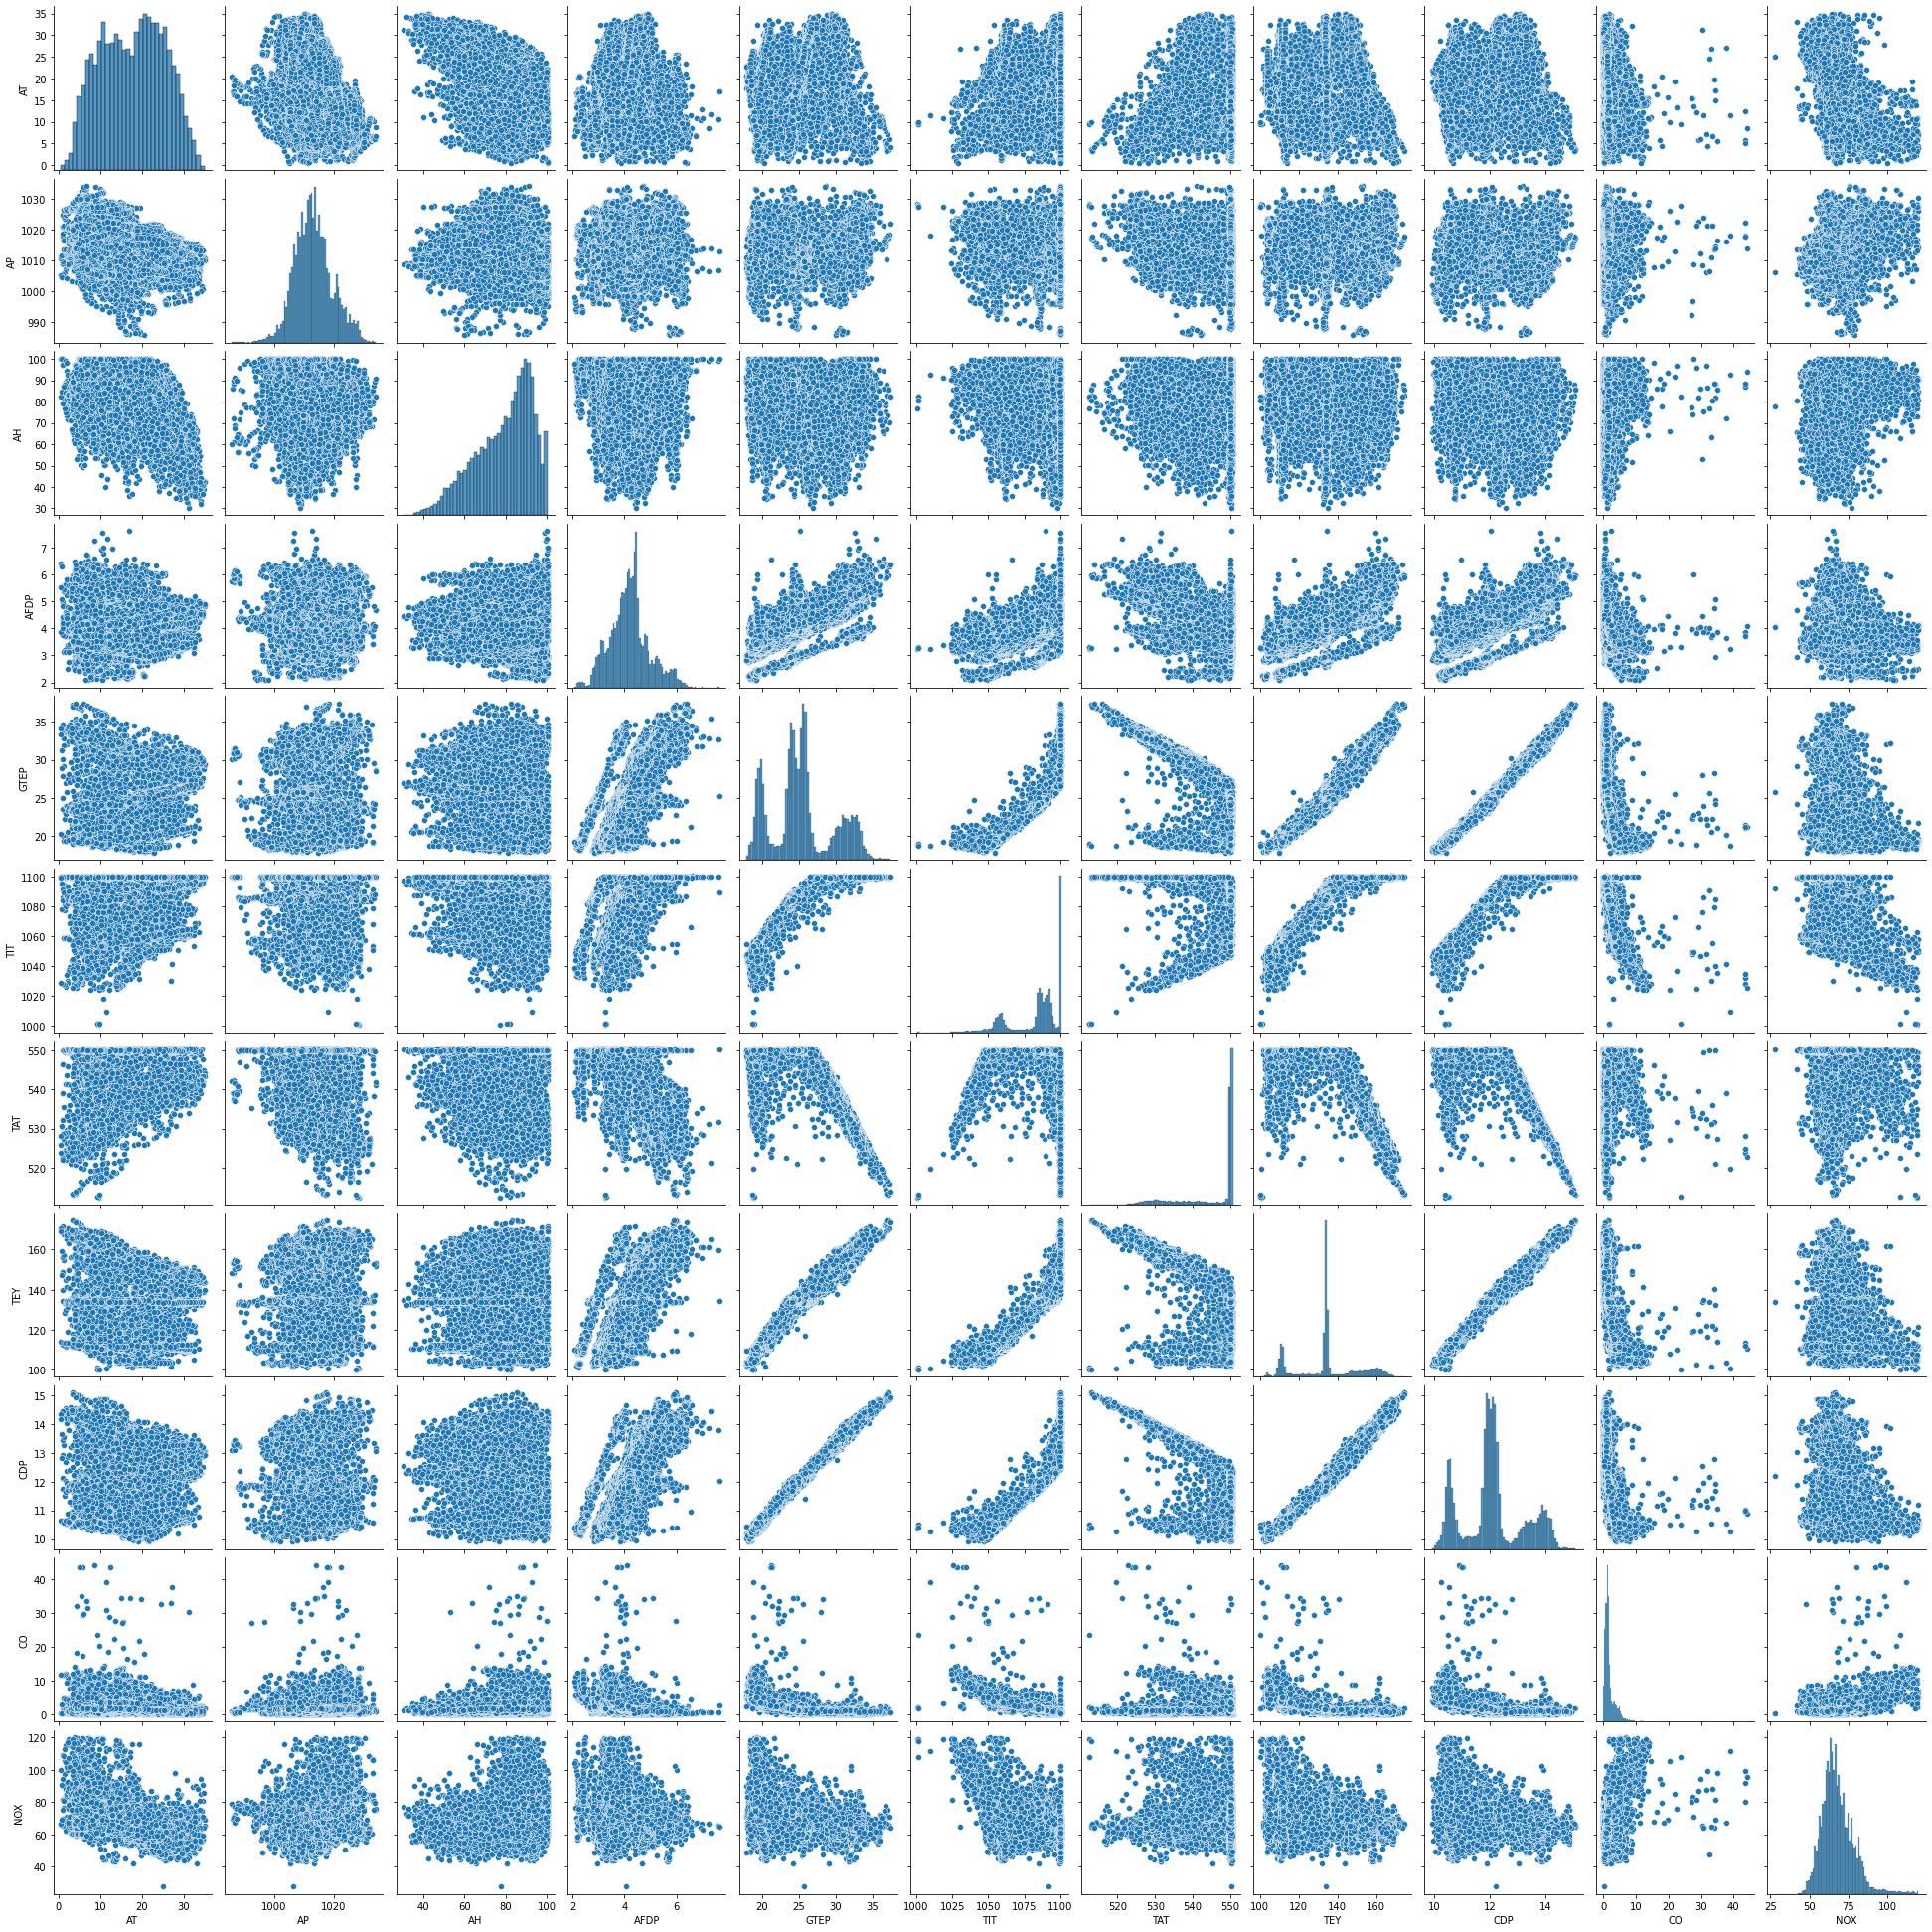

In [16]:
plt.figure(figsize=(10,3))
sns.pairplot(gas)
plt.show()

# 4.Data Preprocessing

In [19]:
X=gas.drop('TEY',axis=1)
y=gas[['TEY']]

### Normalising

In [21]:
minmax=MinMaxScaler()

In [28]:
X_norm=minmax.fit_transform(X)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.2,random_state=99)

# 5.Model Building

## 5.1 Building Architecture

In [51]:
model=Sequential
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

## 5.2 Building compilation

In [52]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics='mse')

# 6.Model Training

In [57]:
model_traning=model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
376/376 [==============================] - 0s 1ms/step - loss: 0.5426 - mse: 0.5426 - val_loss: 0.5267 - val_mse: 0.5267
Epoch 2/300
376/376 [==============================] - 0s 1ms/step - loss: 0.5320 - mse: 0.5320 - val_loss: 0.5265 - val_mse: 0.5265
Epoch 3/300
376/376 [==============================] - 0s 1ms/step - loss: 0.5271 - mse: 0.5271 - val_loss: 0.6232 - val_mse: 0.6232
Epoch 4/300
376/376 [==============================] - 0s 1ms/step - loss: 0.5330 - mse: 0.5330 - val_loss: 0.5195 - val_mse: 0.5195
Epoch 5/300
376/376 [==============================] - 0s 1ms/step - loss: 0.5381 - mse: 0.5381 - val_loss: 0.5193 - val_mse: 0.5193
Epoch 6/300
376/376 [==============================] - 0s 1ms/step - loss: 0.5360 - mse: 0.5360 - val_loss: 0.5196 - val_mse: 0.5196
Epoch 7/300
376/376 [==============================] - 0s 1ms/step - loss: 0.5280 - mse: 0.5280 - val_loss: 0.5245 - val_mse: 0.5245
Epoch 8/300
376/376 [==============================] - 0s 1ms/step - 

# 7.Model Evalution

In [55]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 924us/step - loss: 0.5341 - mse: 0.5341


[0.534051775932312, 0.534051775932312]

# 8.Model Performance

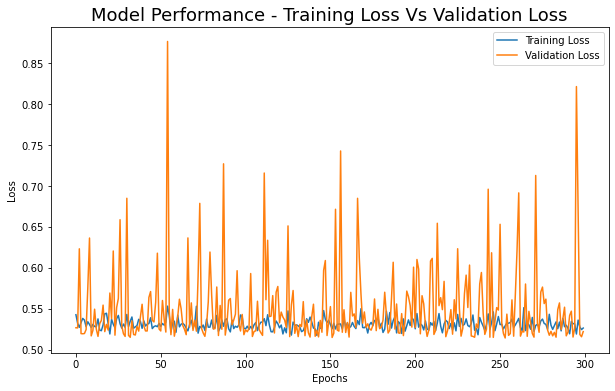

In [59]:
plt.figure(figsize=(10,6))
plt.plot(model_traning.history['loss'],    label = 'Training Loss')
plt.plot(model_traning.history['val_loss'],label = 'Validation Loss')

plt.title('Model Performance - Training Loss Vs Validation Loss',size = 18)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()